# Persiapan Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('loan_sanction_train.csv')
print(df.columns)
df.head()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Diberikan dataset loan_sanction, di sini ingin diprediksi apakah seseorang masuk dalam kategori orang yang dapat diberikan pinjaman atau tidak. Variabel target yang digunakan adalah 'Loan_Status' yaitu status pinjaman.

Berikut informasi yang dapat diambil dari tabel tersebut.
1. Terdapat 6 variabel independent bertipe kategorik dan semuanya termasuk dalam data nominal. Variabel tersebut adalah Gender, Married, Dependents, Education, Self_Employed, dan Property_Area.
2. Terdapat 5 variabel independetn bertipe numerik dan semuanya diskrit. Variabel tersebut adalah ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, dan Credit_History.
3. Fitur Loan_ID tidak dapat digunakan karena fitur tersebut hanya memberikan informasi identitas peminjam yang pasti tidak berpengaruh terhadap status peminjaman.

# EDA and Feature Engineering

## Check for Missing Values

In [ ]:
print(f"Ukuran data adalah: {df.shape}")
print("="*75)
print("Entri data yang hilang: ")
print(df.isna().sum())
print("="*75)
print("Presentase data yang hilang: ")
print(df.isnull().mean())

Ukuran data adalah: (614, 13)
Entri data yang hilang: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Presentase data yang hilang: 
Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


Berdasarkan informasi tersebut, terdapat 6 fitur yang memiliki entri data yang kosong. Namun, persentase dari entri hilang tersebut masih di bawah 9 persen. Karenanya masih dapat dilakukan imputasi untuk dataset tersebut.

## Exploratory and Analysis Data

Cek bagaimana pola atau informasi tertentu yang dapat diambil dari menggunakan berbagai macam plot. Cek bagaimana variabel target bernilai terhadap setiap fitur.

Fitur 'Loan_ID' akan dihilangkan sepenuhnya karena tidak berpengaruh pada variabel target. Lalu, cek apabila ada baris pada dataframe yang memiliki entri kosong lebih dari 3. Jika ada dapat dipertimbangkan untuk dibuang sepenuhnya.

In [ ]:
df = df.drop(columns=['Loan_ID'])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
missing_counts = df.isna().sum(axis=1)
df_empty_3 = df[missing_counts > 3]
df_empty_3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Karena tidak ada baris pada data yang memiliki lebih dari 3 entri hilang maka tidak perlu adanya penghapusan baris pada dataframe.

Sekarang mulai untuk melakukan EDA.

### Untuk Fitur Kategorik

Periksa fitur kategorik terhadap Status Pinjaman

In [ ]:
print("=============Deskripsi data fitur kategorik==============")
df.describe(exclude='number')

=============Deskripsi data fitur kategorik==============


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [ ]:
# Encoding Loan_Status untuk kepentingan perhitungan.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_Status_E'] = le.fit_transform(df['Loan_Status'])

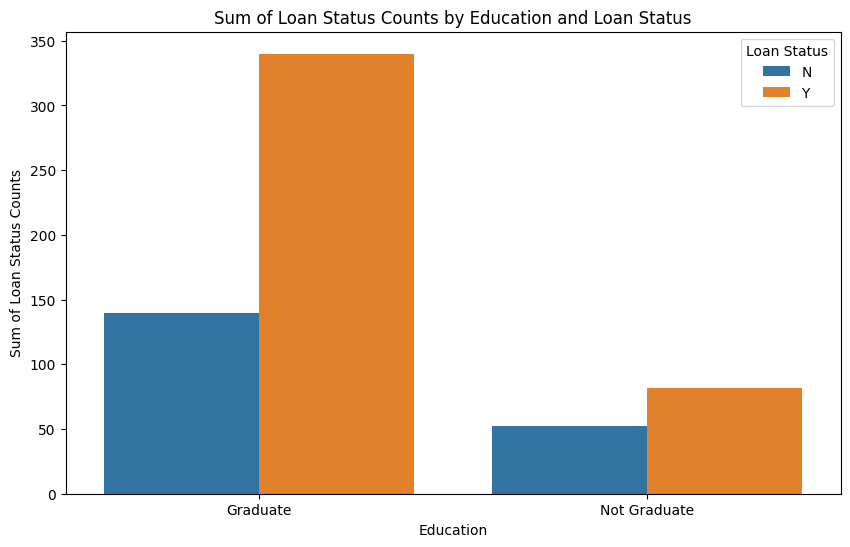

In [ ]:
# Loan Status with Education
Loan_Education = df[['Education', 'Loan_Status', 'Loan_Status_E']]

aggregated_data = Loan_Education.groupby(['Education', 'Loan_Status']).size().reset_index(name='Loan_Status_E')

plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Loan_Status_E', hue='Loan_Status', data=aggregated_data)

# Customize the plot
plt.title('Sum of Loan Status Counts by Education and Loan Status')
plt.xlabel('Education')
plt.ylabel('Sum of Loan Status Counts')
plt.legend(title='Loan Status')
plt.show()

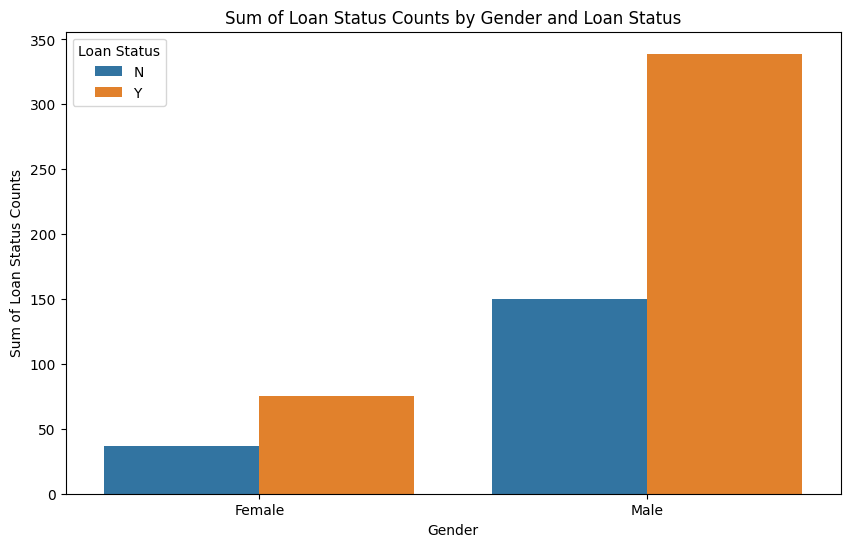

In [ ]:
Loan_Gender = df[['Gender', 'Loan_Status', 'Loan_Status_E']]

aggregated_data = Loan_Gender.groupby(['Gender', 'Loan_Status']).size().reset_index(name='Loan_Status_E')

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Loan_Status_E', hue='Loan_Status', data=aggregated_data)

# Customize the plot
plt.title('Sum of Loan Status Counts by Gender and Loan Status')
plt.xlabel('Gender')
plt.ylabel('Sum of Loan Status Counts')
plt.legend(title='Loan Status')
plt.show()

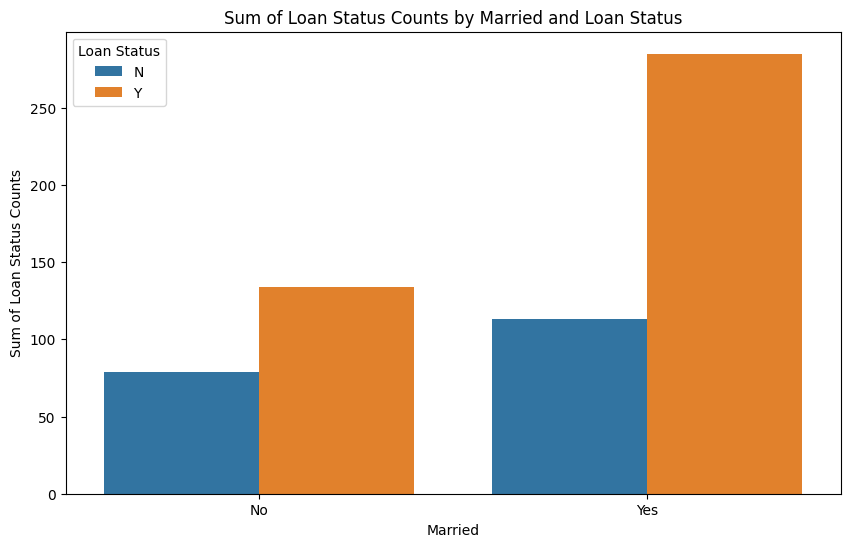

In [ ]:
Loan_Married = df[['Married', 'Loan_Status', 'Loan_Status_E']]

aggregated_data = Loan_Married.groupby(['Married', 'Loan_Status']).size().reset_index(name='Loan_Status_E')

plt.figure(figsize=(10, 6))
sns.barplot(x='Married', y='Loan_Status_E', hue='Loan_Status', data=aggregated_data)

# Customize the plot
plt.title('Sum of Loan Status Counts by Married and Loan Status')
plt.xlabel('Married')
plt.ylabel('Sum of Loan Status Counts')
plt.legend(title='Loan Status')
plt.show()

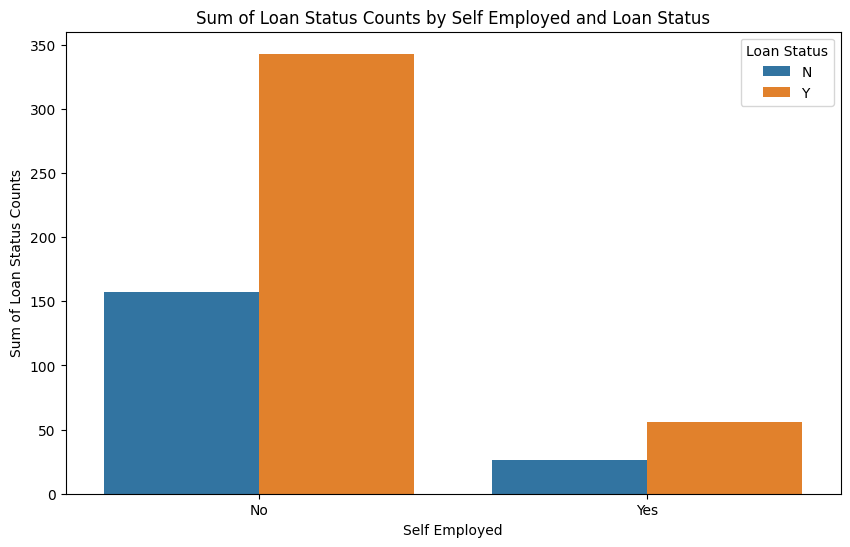

In [ ]:
Loan_Employed = df[['Self_Employed', 'Loan_Status', 'Loan_Status_E']]

aggregated_data = Loan_Employed.groupby(['Self_Employed', 'Loan_Status']).size().reset_index(name='Loan_Status_E')

plt.figure(figsize=(10, 6))
sns.barplot(x='Self_Employed', y='Loan_Status_E', hue='Loan_Status', data=aggregated_data)

# Customize the plot
plt.title('Sum of Loan Status Counts by Self Employed and Loan Status')
plt.xlabel('Self Employed')
plt.ylabel('Sum of Loan Status Counts')
plt.legend(title='Loan Status')
plt.show()

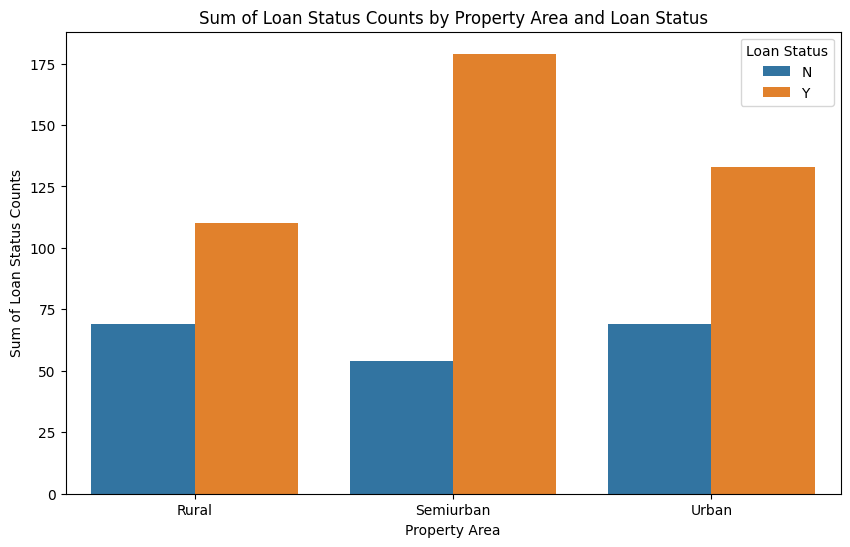

In [ ]:
Loan_Property = df[['Property_Area', 'Loan_Status', 'Loan_Status_E']]

aggregated_data = Loan_Property.groupby(['Property_Area', 'Loan_Status']).size().reset_index(name='Loan_Status_E')

plt.figure(figsize=(10, 6))
sns.barplot(x='Property_Area', y='Loan_Status_E', hue='Loan_Status', data=aggregated_data)

# Customize the plot
plt.title('Sum of Loan Status Counts by Property Area and Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Sum of Loan Status Counts')
plt.legend(title='Loan Status')
plt.show()

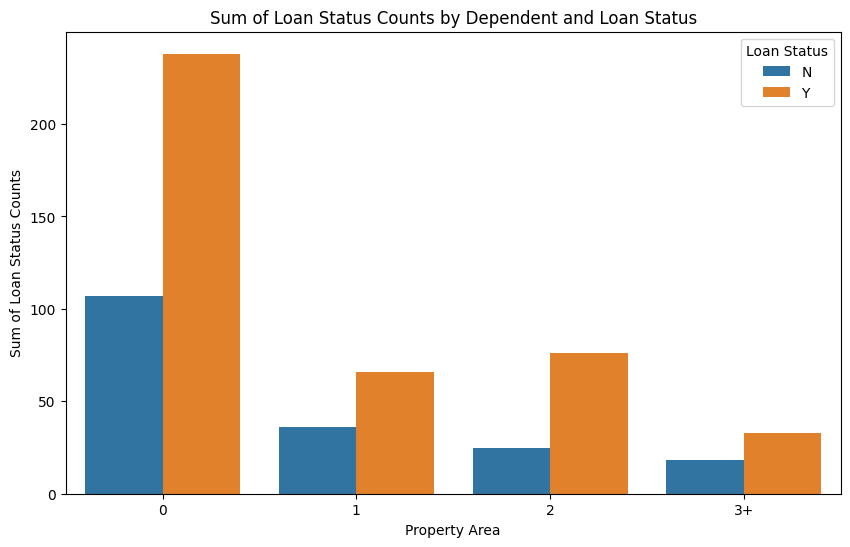

In [ ]:
Loan_Dependents = df[['Dependents', 'Loan_Status', 'Loan_Status_E']]

aggregated_data = Loan_Dependents.groupby(['Dependents', 'Loan_Status']).size().reset_index(name='Loan_Status_E')

plt.figure(figsize=(10, 6))
sns.barplot(x='Dependents', y='Loan_Status_E', hue='Loan_Status', data=aggregated_data)

# Customize the plot
plt.title('Sum of Loan Status Counts by Dependent and Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Sum of Loan Status Counts')
plt.legend(title='Loan Status')
plt.show()

Jika dibaca secara manual, dapat diambil kesimpulan bahwa secara umum fitur-fitur tersebut tidak terlalu berpengaruh terhadap diterima atau tidaknya seseorang untuk mengambil pinjaman rumah. Namun, jika diperhatikan lebih dalam lagi untuk fitur Education, Married, dan Gender ada informasi yang dapat diambil.

Pada fitur Education, orang-orang yang sudah lulus dalam studinya lebih besar kemungkinannya untuk diterima pinjaman rumah.

Pada fitur Married, orang-orang yang sudah menikah memiliki kemungkinan terbesar untuk diterima pinjaman rumah.

Pada fitur Gender, laki-laki umumnya lebih besar kemungkinannya untuk diterima pinjaman rumah.

Dari informasi fitur Married, ada potensi bahwa jumlah gaji seseorang dengan pasangannya juga berpengaruh dalam mendaftar pinjaman rumah.

### Untuk Fitur Numerik

Periksa fitur numerik pada terhadap status pinjaman

In [ ]:
# Buat kolom baru yaitu total income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [ ]:
print("=============Deskripsi data fitur numerik==============")
df.describe(include='number')

=============Deskripsi data fitur numerik==============


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_E,Total_Income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,81000.000000


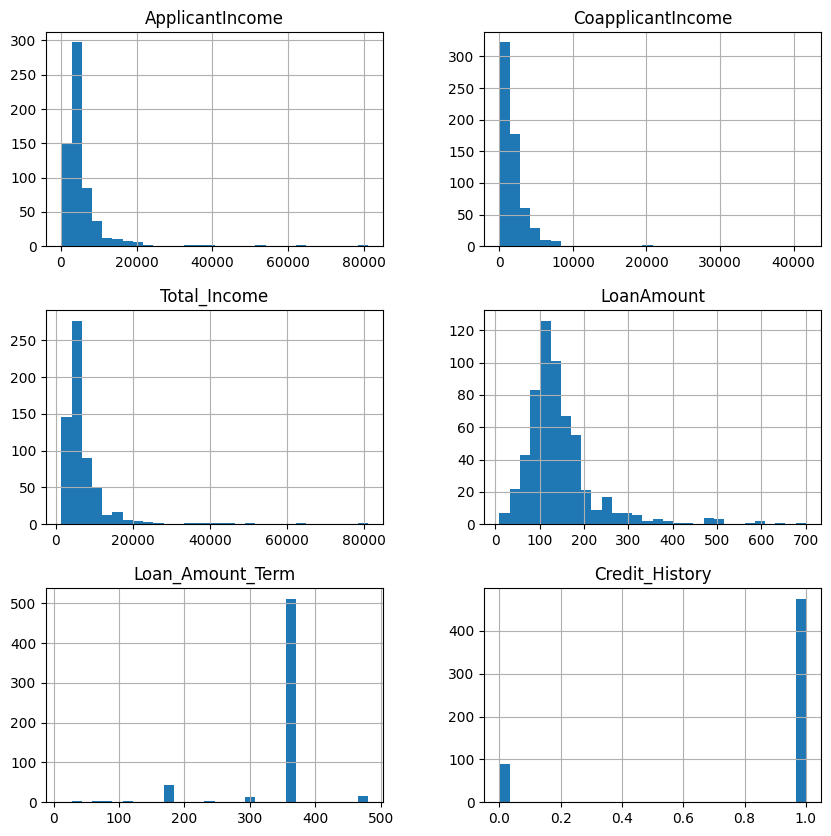

In [ ]:
# Numerical Columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[numerical_columns]
#Individual Distribution
df[numerical_columns].hist(bins=30, figsize=(10, 10))
plt.show()

<Axes: xlabel='LoanAmount', ylabel='Count'>

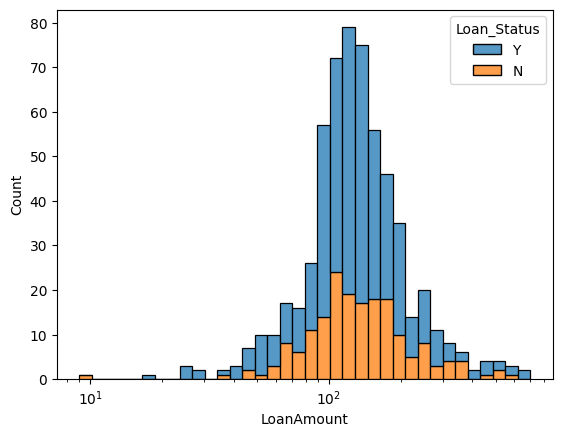

In [ ]:
sns.histplot(data=df, x='LoanAmount', hue='Loan_Status', multiple='stack', log_scale=True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

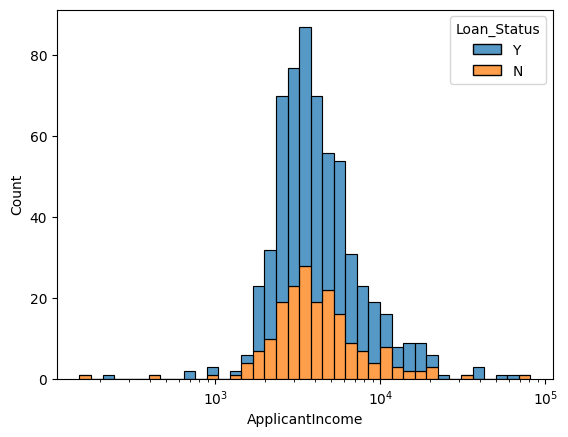

In [ ]:
sns.histplot(data=df, x='ApplicantIncome', hue='Loan_Status', multiple='stack', log_scale=True)

### Kasus Khusus

Untuk fitur Credit_History dan Loan_Amount_Term walaupun fitur tersebut termasuk ke dalam fitur numerik, nyatanya fitur tersebut merupakan kategori. Karenanya akan dilakukan binning pada fitur tersebut.

In [ ]:
df['Credit_History_ct'] = df['Credit_History'].astype(str)

df['Loan_Amount_Term_ct'] = df['Loan_Amount_Term'].astype(str)

df['Credit_History_ct'].unique()

array(['1.0', '0.0', 'nan'], dtype=object)

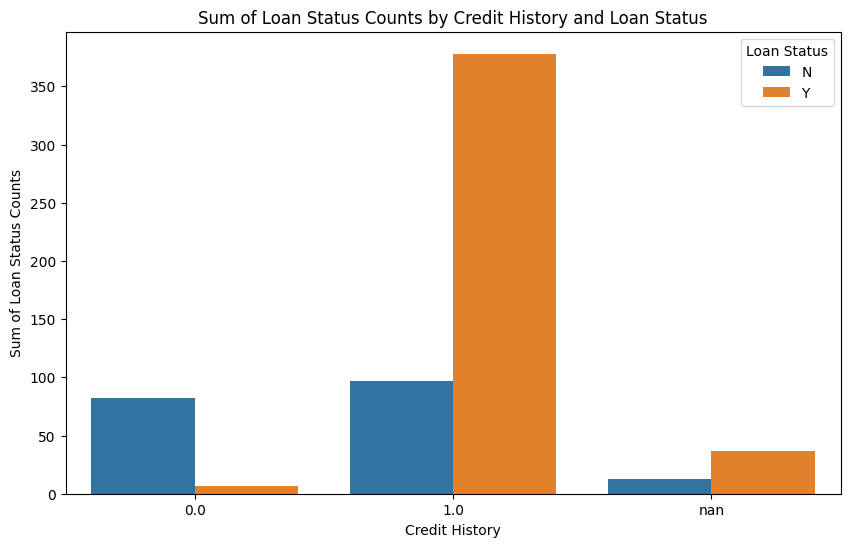

In [ ]:
Loan_Credits = df[['Credit_History_ct', 'Loan_Status', 'Loan_Status_E']]

aggregated_data = Loan_Credits.groupby(['Credit_History_ct', 'Loan_Status']).size().reset_index(name='Loan_Status_E')

plt.figure(figsize=(10, 6))
sns.barplot(x='Credit_History_ct', y='Loan_Status_E', hue='Loan_Status', data=aggregated_data)

# Customize the plot
plt.title('Sum of Loan Status Counts by Credit History and Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Sum of Loan Status Counts')
plt.legend(title='Loan Status')
plt.show()

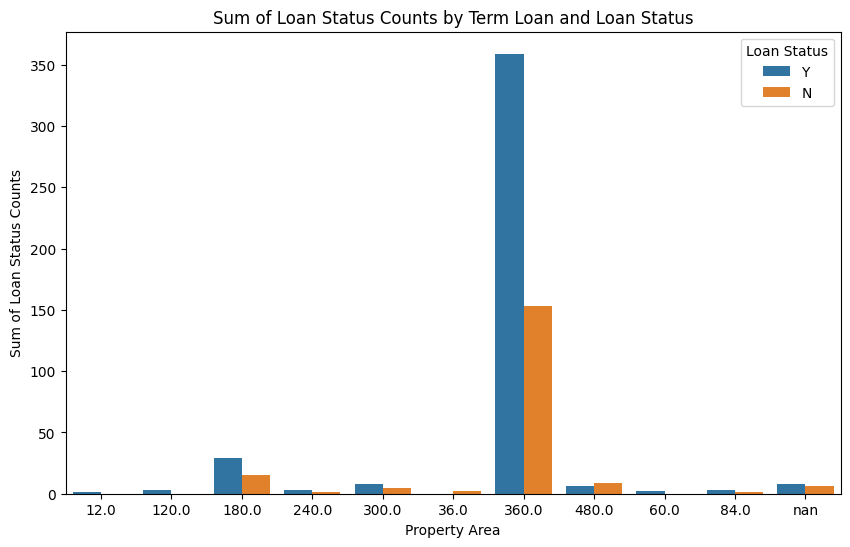

In [ ]:
Loan_Term = df[['Loan_Amount_Term_ct', 'Loan_Status', 'Loan_Status_E']]

aggregated_data = Loan_Term.groupby(['Loan_Amount_Term_ct', 'Loan_Status']).size().reset_index(name='Loan_Status_E')

plt.figure(figsize=(10, 6))
sns.barplot(x='Loan_Amount_Term_ct', y='Loan_Status_E', hue='Loan_Status', data=aggregated_data)

# Customize the plot
plt.title('Sum of Loan Status Counts by Term Loan and Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Sum of Loan Status Counts')
plt.legend(title='Loan Status')
plt.show()

## Data Imputation

Sebelum data ditransformasi, perlu dilakukan imputasi pada kolom fitur numerik agar tidak ada kesalahan dalam perhitungan yang dilakukan. Hal pertama yang perlu dilakukan sebelum melakukan imputasi adalah memilih metode imputasi terbaik untuk dataset yang kita miliki. Oleh karena itu, perlu dilakukan perbandingan metode imputasi mana yang terbaik.

1. Untuk fitur kategorik, akan dilakukan strategi imputasi modus, ratio, dan random.
2. Untuk fitur numerik, akan dilakukan strategi imputasi mean, median, modus, dan knn.

### Imputasi Numerik

In [ ]:
df_num = df[['LoanAmount']]
df_num = df_num.dropna()
df_num.isna().sum()

LoanAmount    0
dtype: int64

In [ ]:
import random

# Cari metode imputasi terbaik untuk data tipe numerik
def missing_value_generator(df_original, percentage):
    df_miss = df_original.copy()
    baris, kolom = df_miss.shape
    n_total = baris*kolom

    permutasi = list(range(n_total))
    random.shuffle(permutasi)

    n_pilih = int(percentage * n_total)
    pilihan = permutasi[0 : n_pilih]

    for p in pilihan:
        df_miss.iloc[ int(p/kolom), p%kolom ] = np.nan

    return df_miss

def compare_imputation(df_ground_truth, methods, percentages):
    list_missing_df = []
    for percent in percentages:
        df_miss = missing_value_generator(df_ground_truth, percent)
        list_missing_df.append(df_miss)

    all_results = []
    for method in methods:
        method_results = []
        for df_miss in list_missing_df:
            df_imputed = method.fit_transform(df_miss)
            SSE = ((df_ground_truth - df_imputed)**2).sum().sum()
            method_results.append(SSE)
        all_results.append(method_results)

    return all_results

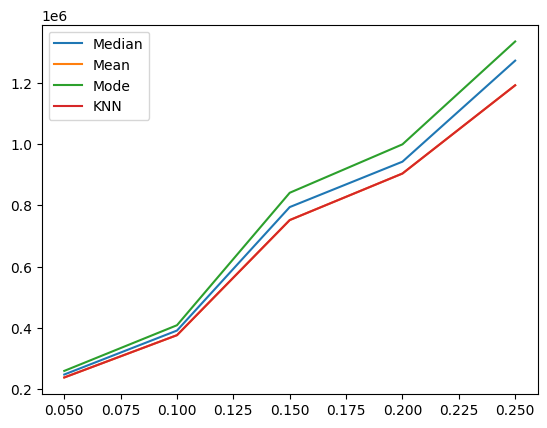

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
KNN_imputer = KNNImputer(missing_values=np.nan, n_neighbors=3)
list_persen = [0.05, 0.10, 0.15, 0.20, 0.25]
results_1 = compare_imputation(df_num, [median_imputer, mean_imputer, mode_imputer, KNN_imputer], list_persen)
results_2 = compare_imputation(df_num, [median_imputer, mean_imputer, mode_imputer, KNN_imputer], list_persen)
results_3 = compare_imputation(df_num, [median_imputer, mean_imputer, mode_imputer, KNN_imputer], list_persen)
results_4 = compare_imputation(df_num, [median_imputer, mean_imputer, mode_imputer, KNN_imputer], list_persen)
results_5 = compare_imputation(df_num, [median_imputer, mean_imputer, mode_imputer, KNN_imputer], list_persen)

results = (np.array(results_1) + np.array(results_2) + np.array(results_3) + np.array(results_4) + np.array(results_5)) / 5

plt.plot(list_persen, results[0])
plt.plot(list_persen, results[1])
plt.plot(list_persen, results[2])
plt.plot(list_persen, results[3])

plt.legend(["Median", "Mean", "Mode", "KNN"])
plt.show()

Imputasi oleh KNN dan Mean menunjukkan hasil yang sama dengan memperoleh error terkecil. Untuk simplisitas akan digunakan mean sebagai imputasi entri data yang hilang

In [ ]:
df[['LoanAmount']] = mean_imputer.fit_transform(df[['LoanAmount']])
# imputasi selesai

In [ ]:
df.isna().sum()

Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
Loan_Status_E           0
Total_Income            0
Credit_History_ct       0
Loan_Amount_Term_ct     0
dtype: int64

### Imputasi Kategorik

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
mode_impute = SimpleImputer(strategy='most_frequent')
df[['Credit_History']] = mode_impute.fit_transform(df[['Credit_History']])
df[['Loan_Amount_Term']] = mode_impute.fit_transform(df[['Loan_Amount_Term']])
df[['Married']] = mode_impute.fit_transform(df[['Married']])

In [ ]:
# Random Sample
import pandas as pd
import numpy as np

def random_sample_imputation(df, columns):
    df_imputed = df.copy()

    for column in columns:
        missing = df_imputed[column].isnull()
        n_missing = missing.sum()

        if n_missing > 0:
            sampled_values = df_imputed.loc[~missing, column].sample(n=n_missing, replace=True).values
            df_imputed.loc[missing, column] = sampled_values

    return df_imputed

In [ ]:
df = random_sample_imputation(df, ['Gender', 'Self_Employed', 'Dependents'])

In [ ]:
df.isna().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Loan_Status_E          0
Total_Income           0
Credit_History_ct      0
Loan_Amount_Term_ct    0
dtype: int64

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_E,Total_Income,Credit_History_ct,Loan_Amount_Term_ct
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,5849.0,1.0,360.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,6091.0,1.0,360.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,3000.0,1.0,360.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,4941.0,1.0,360.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,6000.0,1.0,360.0


# Model Machine Learning

## Feature Engineering

In [ ]:
new_df = df.copy()

In [ ]:
new_df['Gender'] = new_df['Gender'].map({'Male':0, 'Female':1})
new_df['Married'] = new_df['Married'].map({'No':0, 'Yes':1})
new_df['Dependents'] = new_df['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
new_df['Self_Employed'] = new_df['Self_Employed'].map({'No':0, 'Yes':1})
new_df['Property_Area'] = new_df['Property_Area'].map({'Urban':0, 'Semiurban':1, 'Rural':2})
new_df['Education'] = new_df['Education'].map({'Graduate': 0, 'Not Graduate':1})

In [ ]:
new_df = new_df.drop(columns=['Credit_History_ct', 'Loan_Amount_Term_ct'])

In [ ]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_E,Total_Income
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,Y,1,5849.0
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,2,N,0,6091.0
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,Y,1,3000.0
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,Y,1,4941.0
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,Y,1,6000.0


In [ ]:
X=new_df.drop(columns=['Loan_Status', 'Loan_Status_E'])
y=new_df['Loan_Status']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Total_Income       614 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [ ]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import jaccard_score, accuracy_score, confusion_matrix

## Decision Tree Model

In [ ]:
clf = DecisionTreeClassifier(ccp_alpha=0.01, splitter='best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [ ]:
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Test Data : {test_accuracy*100} %")

Accuracy of Test Data : 78.86178861788618 %


In [ ]:
cm = confusion_matrix(y_pred, y_test)

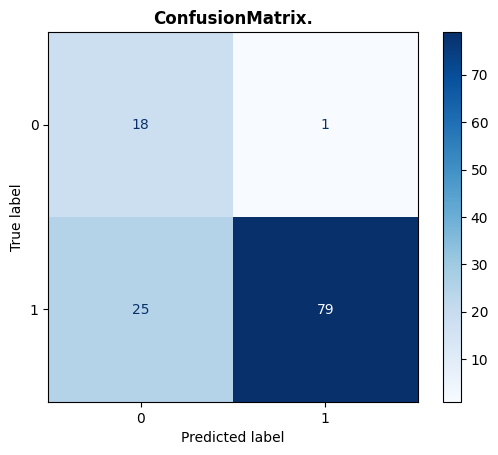

In [ ]:
matrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_acc_scores = cross_val_score(
    X=X_train, y=y_train, cv=5, estimator=clf, n_jobs=-1
)
print(cv_acc_scores)

[0.84848485 0.75510204 0.79591837 0.78571429 0.80612245]


In [ ]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


model = GridSearchCV(
    estimator=clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0.01), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
model.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

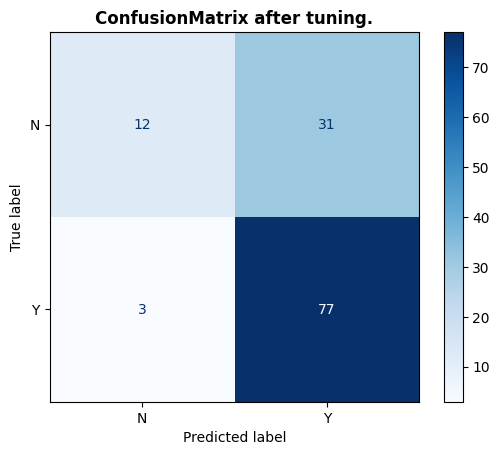

In [ ]:
matrix = ConfusionMatrixDisplay.from_estimator(estimator=model, X=X_test, y=y_test, cmap="Blues")
plt.title("ConfusionMatrix after tuning.", weight="bold");

## Random Forrest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
rfc = RandomForestClassifier(n_estimators=250, random_state=250)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=250)

In [ ]:
y_pred1 = rfc.predict(X_test)

In [ ]:
test_accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy of Test Data : {test_accuracy1*100} %")

Accuracy of Test Data : 76.42276422764228 %


In [ ]:
cm = confusion_matrix(y_pred1, y_test)

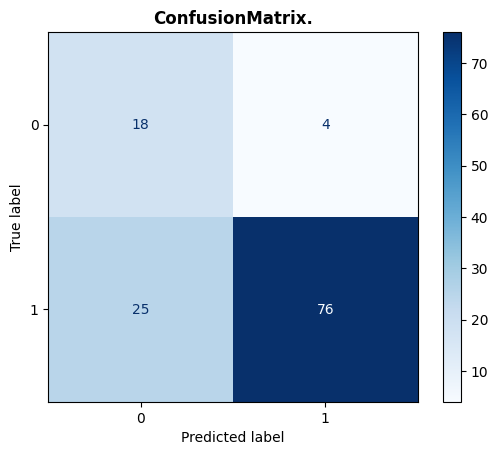

In [ ]:
matrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
matrix.plot(cmap="Blues")
plt.title("ConfusionMatrix.", weight="bold");